In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("spotify_millsongdata.csv")

# Tokenization

In [3]:
tokenizer = Tokenizer()

songs = []
for row in data["text"][:1000]:
    song = row.lower().replace("  ", "").split("\n")
    song = [word for word in song if word != "" or word !='\r']
    songs.append(song)

corpus = [element for innerList in songs for element in innerList]

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'\r': 1, 'the': 2, 'i': 3, 'you': 4, 'and': 5, 'to': 6, 'a': 7, 'in': 8, 'my': 9, 'me': 10, 'of': 11, 'it': 12, 'that': 13, 'your': 14, "i'm": 15, 'on': 16, 'all': 17, 'is': 18, 'be': 19, 'for': 20, 'we': 21, 'love': 22, 'so': 23, "don't": 24, 'but': 25, 'just': 26, 'when': 27, "it's": 28, 'with': 29, 'like': 30, 'you\r': 31, 'no': 32, 'know': 33, 'if': 34, "you're": 35, 'me\r': 36, 'can': 37, 'what': 38, 'was': 39, 'this': 40, 'do': 41, 'one': 42, 'are': 43, 'never': 44, 'got': 45, 'get': 46, 'oh': 47, 'up': 48, 'now': 49, 'have': 50, 'want': 51, 'not': 52, 'out': 53, "can't": 54, 'at': 55, 'take': 56, 'down': 57, 'time': 58, 'will': 59, 'see': 60, 'as': 61, 'he': 62, 'come': 63, 'gonna': 64, 'let': 65, 'from': 66, 'she': 67, 'make': 68, 'go': 69, "i'll": 70, 'la': 71, 'they': 72, 'baby': 73, "i've": 74, 'there': 75, 'feel': 76, 'say': 77, 'could': 78, "there's": 79, 'tell': 80, 'how': 81, 'our': 82, 'need': 83, 'where': 84, 'chorus': 85, 'little': 86, 'yeah': 87, "we're": 88, 'her':

# Preparing the Data

**-->The logic is to predict the last word in a given sentence**

In [4]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))


xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

# Model Initializing and Fitting

In [5]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(tf.keras.layers.GRU(128)))
model.add(Dense(total_words, activation='softmax'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',  
              metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')



e:\Python\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(xs, ys, epochs=10, verbose=1)
#print model.summary()
print(model)

Epoch 1/10
5947/5947 ━━━━━━━━━━━━━━━━━━━━ 288s 45ms/step - accuracy: 0.0393 - loss: 0.0132
Epoch 2/10
5947/5947 ━━━━━━━━━━━━━━━━━━━━ 262s 44ms/step - accuracy: 0.0607 - loss: 6.4223e-04
Epoch 3/10
5947/5947 ━━━━━━━━━━━━━━━━━━━━ 301s 51ms/step - accuracy: 0.0876 - loss: 5.9767e-04
Epoch 4/10
5947/5947 ━━━━━━━━━━━━━━━━━━━━ 304s 51ms/step - accuracy: 0.1283 - loss: 5.5057e-04
Epoch 5/10
5947/5947 ━━━━━━━━━━━━━━━━━━━━ 284s 48ms/step - accuracy: 0.1549 - loss: 5.1595e-04
Epoch 6/10
5947/5947 ━━━━━━━━━━━━━━━━━━━━ 283s 47ms/step - accuracy: 0.1780 - loss: 4.8813e-04
Epoch 7/10
5947/5947 ━━━━━━━━━━━━━━━━━━━━ 273s 46ms/step - accuracy: 0.2032 - loss: 4.6462e-04
Epoch 8/10
5947/5947 ━━━━━━━━━━━━━━━━━━━━ 274s 46ms/step - accuracy: 0.2261 - loss: 4.4459e-04
Epoch 9/10
5947/5947 ━━━━━━━━━━━━━━━━━━━━ 278s 47ms/step - accuracy: 0.2474 - loss: 4.2654e-04
Epoch 10/10
5947/5947 ━━━━━━━━━━━━━━━━━━━━ 279s 47ms/step - accuracy: 0.2686 - loss: 4.1119e-04
<Sequential name=sequential, built=True>


# Accuracy Graph

In [8]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

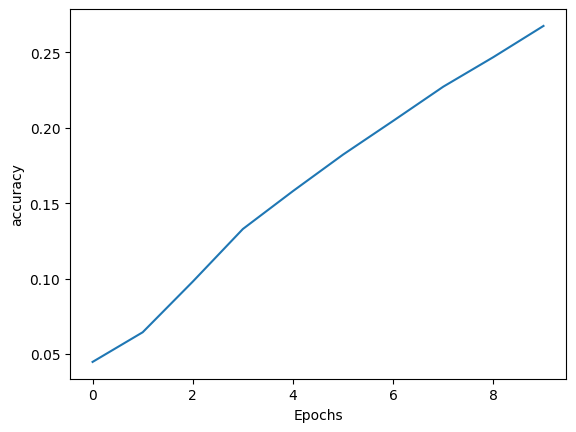

In [9]:
plot_graphs(history, 'accuracy')


# New Text Generation

In [10]:
seed_text = "this is a good day"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━

In [11]:
print(seed_text)

 his is a good day of your heart
